In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(''.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes_data_upload.csv to diabetes_data_upload.csv



In [3]:
filename = 'diabetes_data_upload.csv'
data = pd.read_csv(filename)
print(data.shape)
print(data)

(520, 17)
     Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]


In [4]:
columns = data.columns

In [ ]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
class,0,0.0
Genital thrush,0,0.0
Gender,0,0.0
Polyuria,0,0.0
Polydipsia,0,0.0
sudden weight loss,0,0.0
weakness,0,0.0
Polyphagia,0,0.0
visual blurring,0,0.0
Obesity,0,0.0


In [5]:
diabetes = data['class']
data = data.drop(['class'],axis = 1)

In [ ]:
diabetes

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

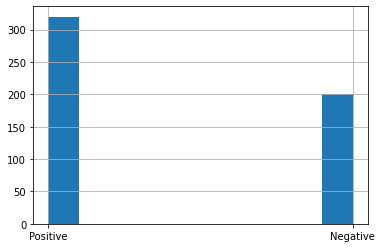

In [ ]:
diabetes.hist()

In [6]:
data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']] = data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']].replace({'No':0,'Yes':1})

In [ ]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: Gender, Length: 520, dtype: object

In [7]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})

In [ ]:
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [ ]:
Stats = data['Age'].describe()

In [ ]:
random = pd.DataFrame(np.random.normal(Stats[1], Stats[2], 520).astype(int),columns=['Age_Normal'])

Text(0.5, 0, 'Age')

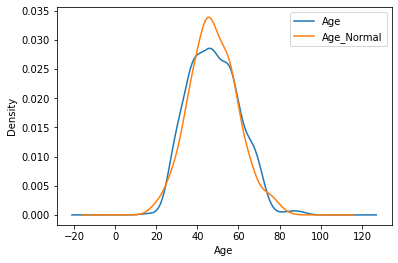

In [ ]:
ax = data['Age'].plot(kind='kde',legend = True)
random.plot(kind='kde', ax=ax,legend = True )
ax.set_xlabel('Age')

In [ ]:
min = np.quantile(Age,0)
quant1 = np.quantile(Age,0.2)
quant2 = np.quantile(Age,0.4)
quant3 = np.quantile(Age,0.6)
quant4 = np.quantile(Age,0.8)
quant5 = np.quantile(Age,1)

In [ ]:
bins = pd.cut(data['Age'], [min, quant1, quant2, quant3, quant4, quant5])

In [ ]:
bins.value_counts(sort=False)

(16.0, 37.0]    107
(37.0, 44.0]    105
(44.0, 50.0]    100
(50.0, 58.0]    108
(58.0, 90.0]     99
Name: Age, dtype: int64

In [ ]:
bins1 = pd.cut(random['Age_Normal'], [min, quant1, quant2, quant3, quant4, quant5])

In [ ]:
bins1.value_counts(sort=False)

(16.0, 37.0]     98
(37.0, 44.0]    112
(44.0, 50.0]    102
(50.0, 58.0]    121
(58.0, 90.0]     87
Name: Age_Normal, dtype: int64

In [ ]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=bins.value_counts(sort=False).to_numpy(), f_exp= bins1.value_counts(sort=False).to_numpy() )


Power_divergenceResult(statistic=4.355112927188544, pvalue=0.36007462769833426)

In [8]:
teen = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Teen'])
adult = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Adult'])
old = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Old'])

In [9]:
teen['Teen'] = data['Age'].loc[data['Age'] <= 20.0]
adult['Adult'] = data['Age'].loc[data['Age'] > 0].loc[data['Age'] <= 65]
old['Old'] = data['Age'].loc[data['Age'] > 65]

In [10]:
teen = teen.isna().replace({True: 0,False:1})

In [11]:
adult = adult.isna().replace({True: 0,False:1})

In [12]:
old = old.isna().replace({True: 0,False:1})

In [13]:
diabetes = diabetes.replace({'Negative':0,'Positive':1})

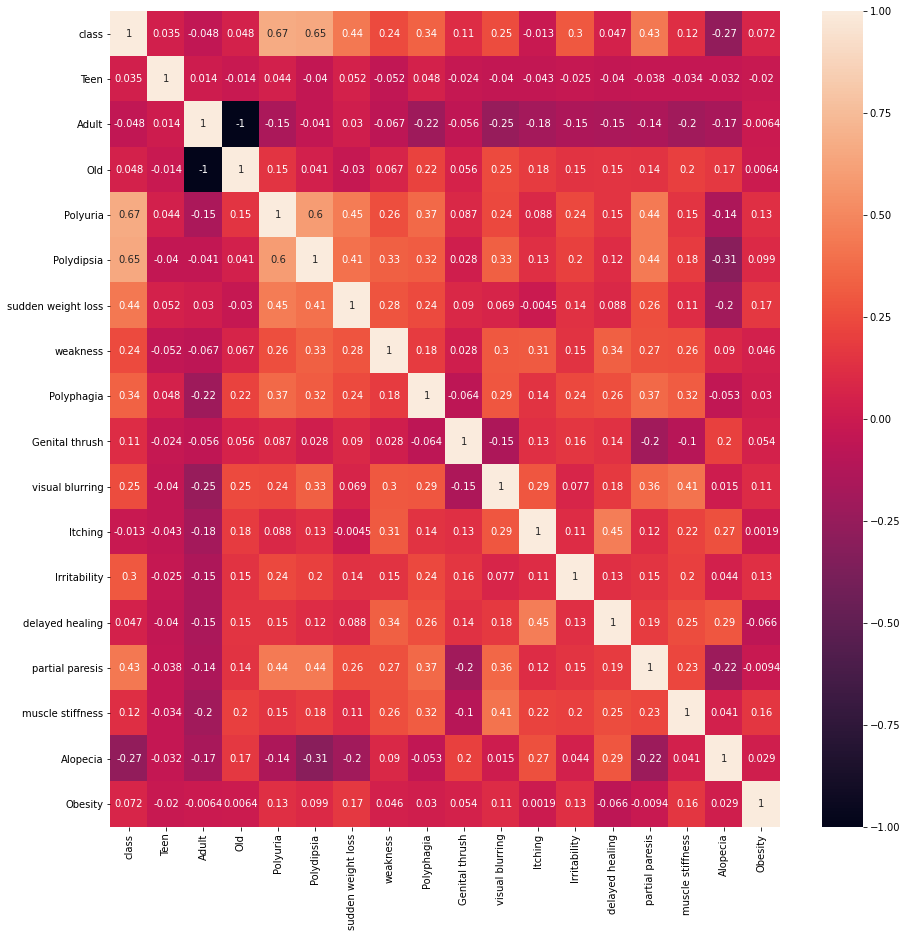

In [ ]:
#Matriz de Correlaciones

plt.figure(figsize=(15,15)) #manage the size of the plot
sns.heatmap(pd.concat([diabetes,teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

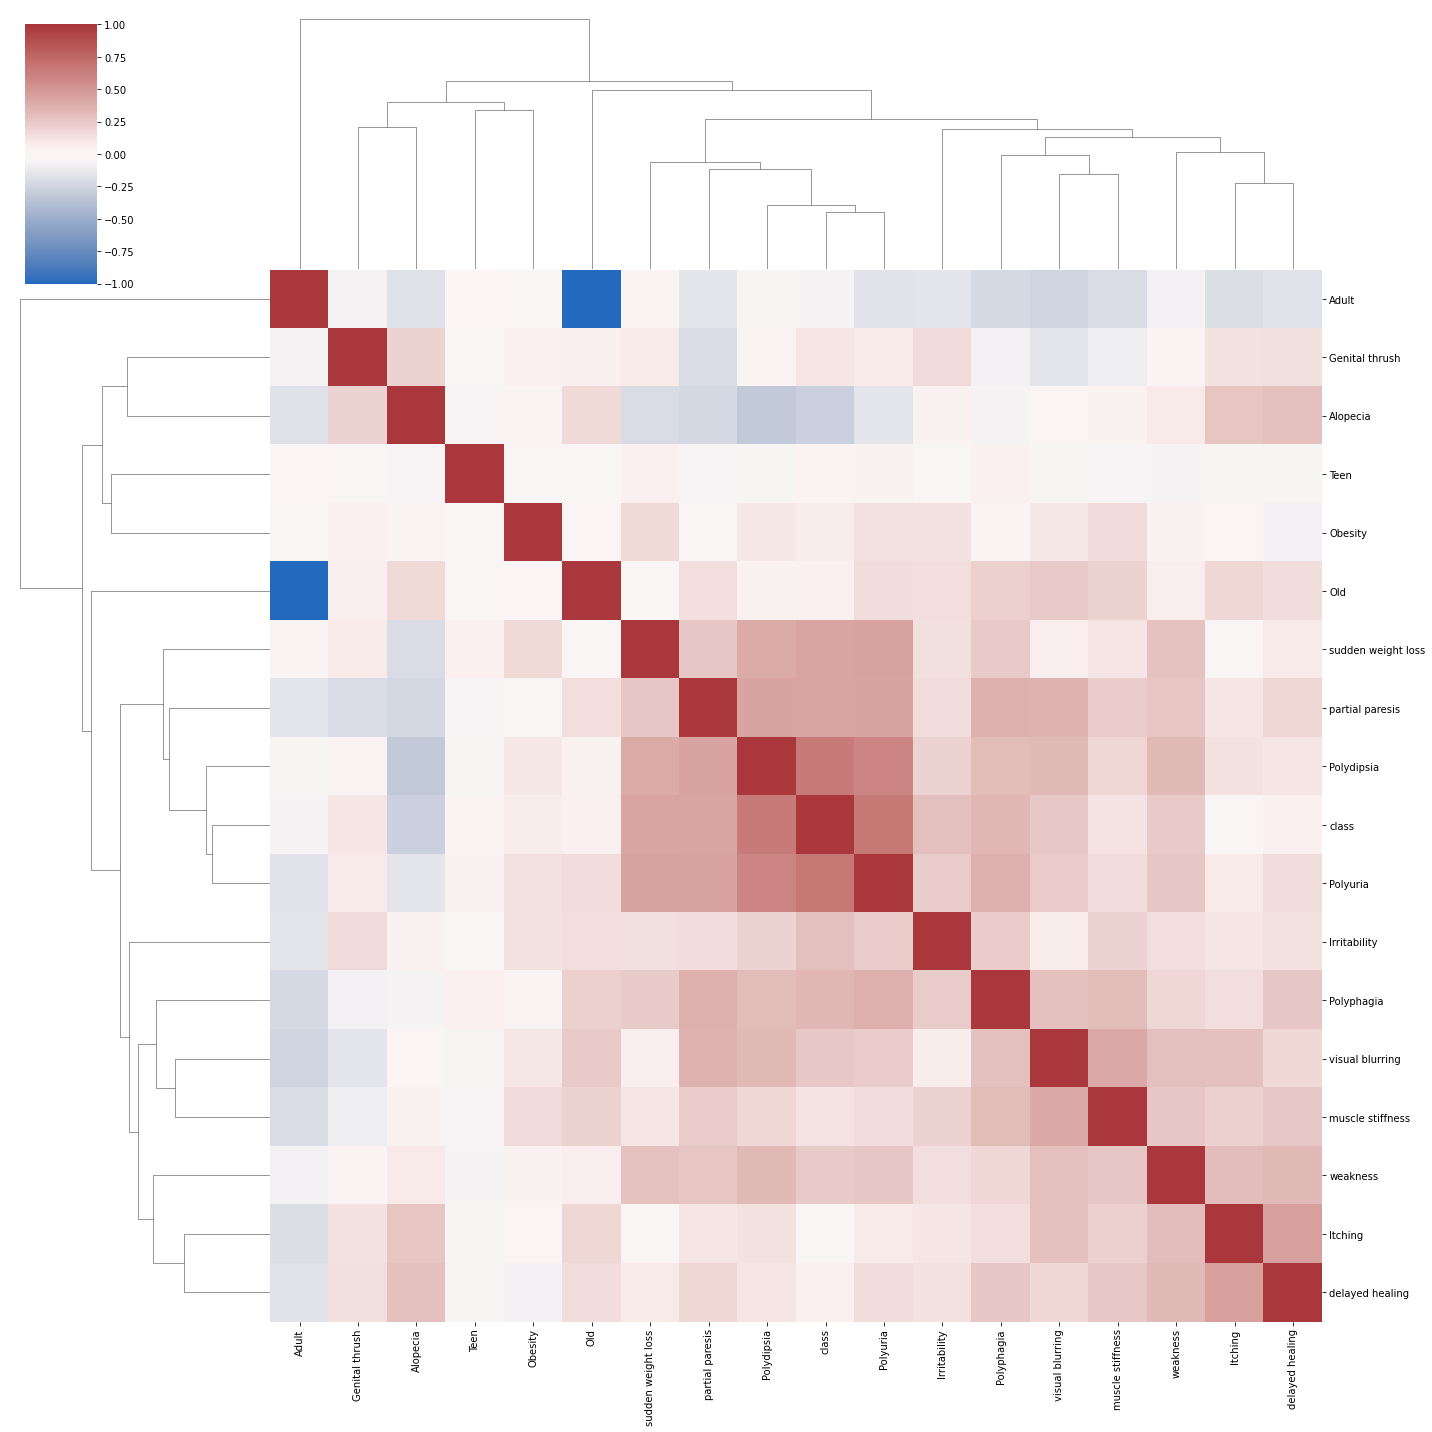

In [ ]:
sns.clustermap(pd.concat([diabetes,teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).corr(),
                                cmap="vlag",
                                figsize=(20,20))

In [14]:
columnas1 = ['Teen','Adult','Old','Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [15]:
y = diabetes.to_numpy()
X = pd.concat([teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).to_numpy()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [17]:

params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
          'min_samples_split': [2,3,4,5,6,7,8],
          'min_samples_leaf': [1,2,3,4,5,6,7,8]}

In [18]:
DT = DecisionTreeClassifier()

grid_dt = GridSearchCV(DT, params, cv=10)
modeldt = grid_dt.fit(X_train, y_train)

In [20]:
grid_dt.best_score_

0.9590592334494774

In [19]:
grid_dt.best_params_

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
grid_dt. best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DT = DT.fit(X_train,y_train)
y_train_predictDT = DT.predict(X_train)
y_test_predictDT  = DT.predict(X_test)

In [22]:
names = ['Accuracy','Precision','f1','recall']
scores = [accuracy_score(y_test,y_test_predictDT)*100,precision_score(y_test,y_test_predictDT)*100,f1_score(y_test,y_test_predictDT)*100,recall_score(y_test,y_test_predictDT)*100]

In [23]:
for i in range(len(names)):
  print('Test {} score is {}'.format(names[i],scores[i]),end='\n')

Test Accuracy score is 94.23076923076923
Test Precision score is 96.875
Test f1 score is 95.38461538461539
Test recall score is 93.93939393939394


In [24]:
scores_train = [accuracy_score(y_train,y_train_predictDT)*100,precision_score(y_train,y_train_predictDT)*100,f1_score(y_train,y_train_predictDT)*100,recall_score(y_train,y_train_predictDT)*100]

In [26]:
for i in range(len(names)):
  print('Train {} score is {}'.format(names[i],scores_train[i]),end='\n')

Train Accuracy score is 98.79807692307693
Train Precision score is 100.0
Train f1 score is 99.00596421471172
Train recall score is 98.03149606299213


In [27]:
cn = ['Negative','Positive']

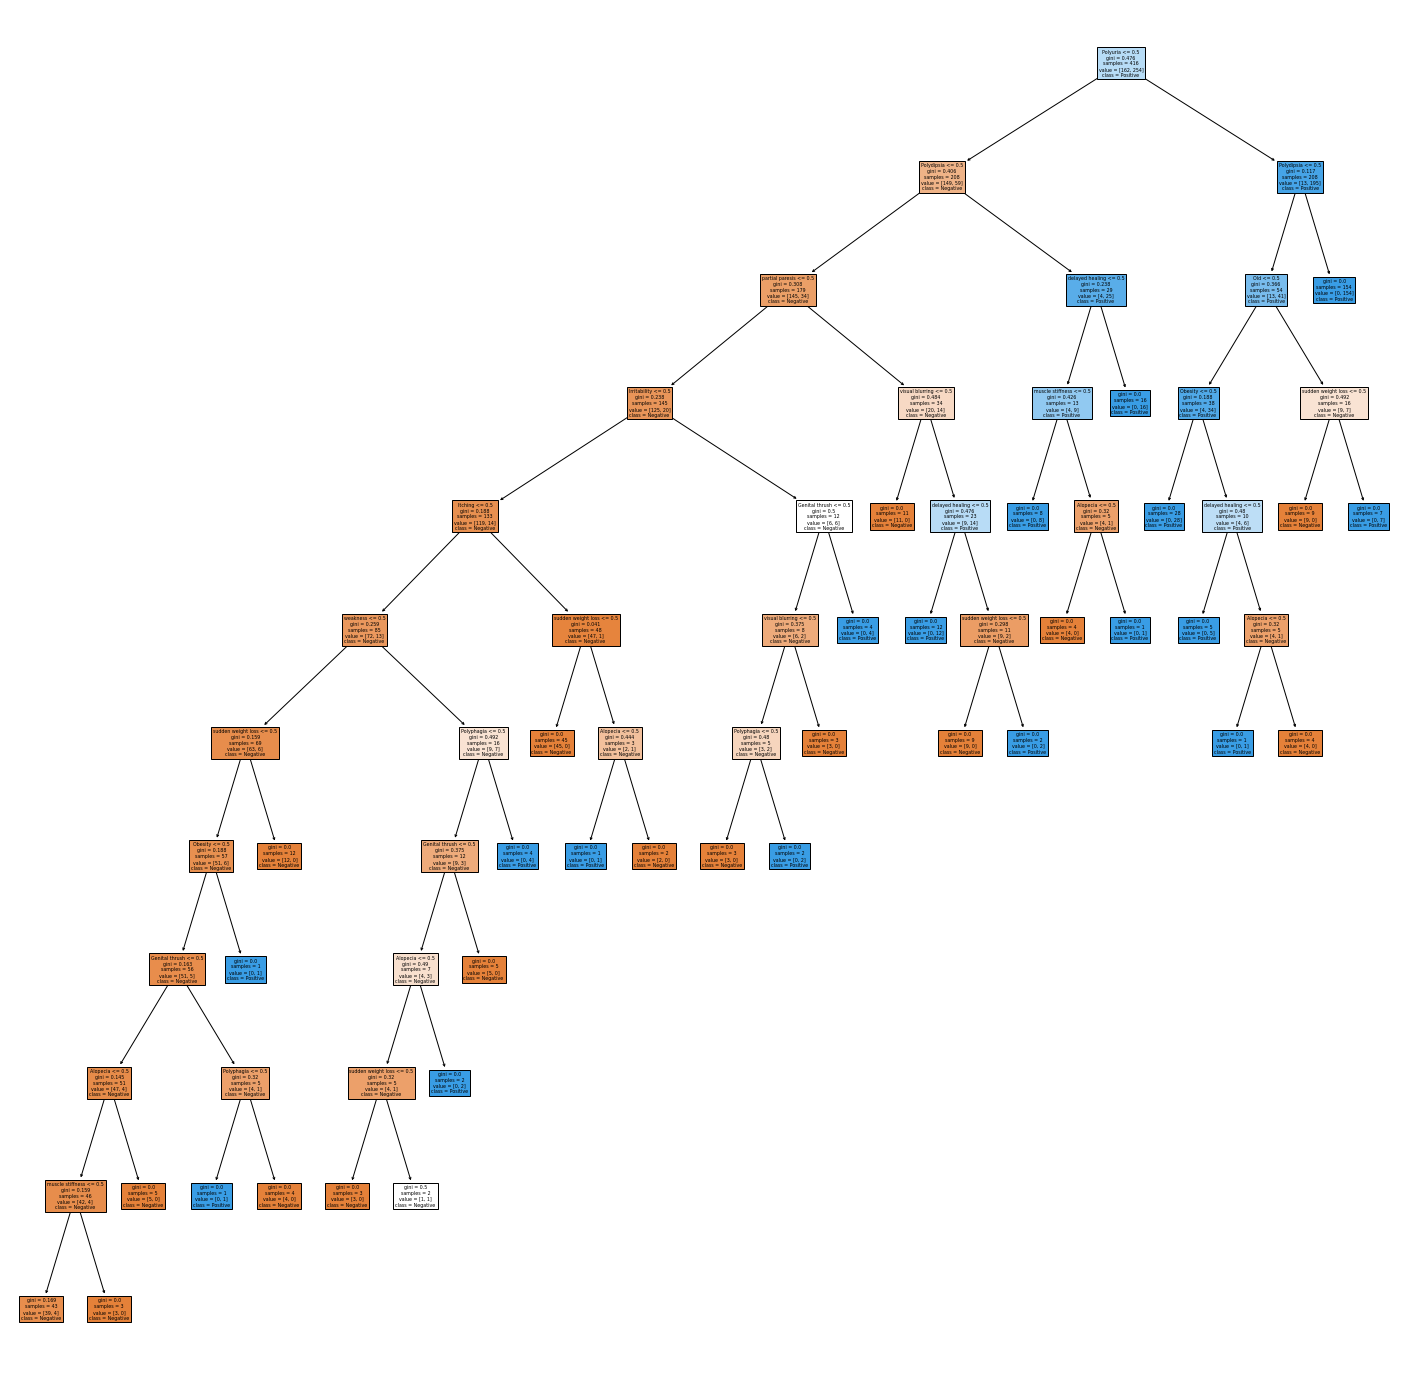

In [28]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(DT,feature_names = columnas1, 
               class_names=cn,
               filled = True)
plt.show()